In [1]:
%matplotlib inline
from modsim import *
import matplotlib.animation as animation

In [2]:
def slope_func(state, t, system):
#     x_r, y_r, vx_r, vy_r, x_p, y_p, vx_p, vy_p = state
    x_r, y_r, vx_r, vy_r = state
    unpack(system)
    
    pos = Vector(x_r, y_r)
    
    if pos.mag > rp:
        acc = - (G * mp / (pos.mag**2)).m * pos.hat()
    else:
        # hit planet surface
        vx_r = 0
        vy_r = 0
        acc = Vector(0,0)

    return vx_r, vy_r, acc.x, acc.y

In [3]:
init = State(
    x_r=-1e10, 
    y_r=300e6, 
    vx_r = 17e3,
    vy_r = 0)

In [65]:
duration = 11e5

system = System(
    init=init, 
    G=6.67408e-11, 
    ts=linspace(0,duration,1000),
    mr = 721.9,
    mp = 1.9e27,
    rp = 70e6)

In [66]:
run_odeint(system, slope_func)
results = system.results
x_r = results.x_r
y_r = results.y_r

In [67]:
def rocket_to_circles(t, x_r, y_r, ax):
    x = interpolate(x_r)(t)
    y = interpolate(y_r)(t)
    ax.add_artist(plt.Circle((x,y), system.rp, color='r'))
    return []

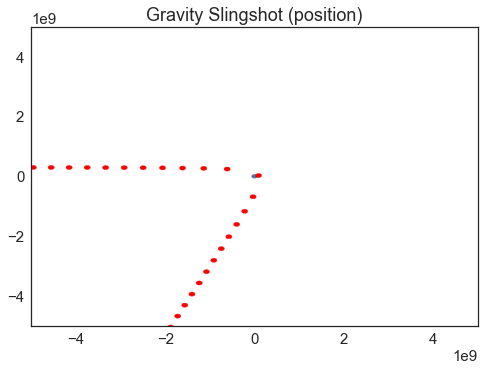

In [68]:
fig1 = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(9,9)

ax = plt.axes(xlim=(-5e9,5e9), ylim=(-5e9,5e9))
ax.add_artist(plt.Circle((0,0), system.rp))
# plt.plot(x_r, y_r, c='black', linewidth=0.5)
plt.title('Gravity Slingshot (position)')

frames = linspace(0,duration, 50)
ani = animation.FuncAnimation(fig1, rocket_to_circles, frames, 
                              fargs=(x_r, y_r, ax), interval=50, blit=True)

ani.save('slingshot.gif', writer='imagemagick')
plt.show()

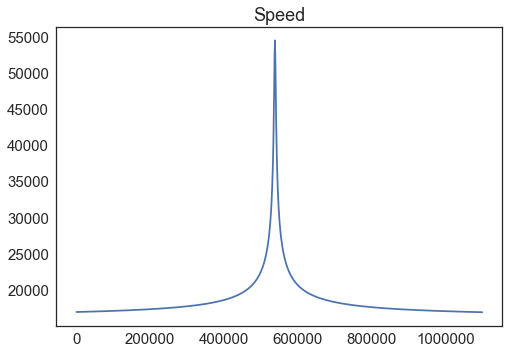

In [69]:
vx_r = results.vx_r
vy_r = results.vy_r
v_r = np.sqrt(vx_r**2 + vy_r**2)
plt.plot(v_r)
plt.title('Speed')